In [41]:
!ls ../input/rsna-intracranial-hemorrhage-detection/ | head

stage_1_sample_submission.csv
stage_1_test_images
stage_1_train.csv
stage_1_train_images


In [42]:
TRAIN_DIR = '../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/'
TEST_DIR = '../input/rsna-intracranial-hemorrhage-detection/stage_1_test_images/'
!ls ../input/rsna-intracranial-hemorrhage-detection/stage_1_test_images | head

ID_000012eaf.dcm
ID_0000ca2f6.dcm
ID_000259ccf.dcm
ID_0002d438a.dcm
ID_00032d440.dcm
ID_00044a417.dcm
ID_0004cd66f.dcm
ID_0005b2d86.dcm
ID_0005db660.dcm
ID_000624786.dcm
ls: write error: Broken pipe


In [43]:
import os
print('Train images: ', len(os.listdir(TRAIN_DIR)))
print('Test images: ', len(os.listdir(TEST_DIR)))

Train images:  674258
Test images:  78545


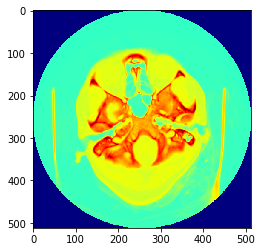

In [44]:
import pydicom
import matplotlib.pyplot as plt

dicom = pydicom.dcmread(TRAIN_DIR + 'ID_000039fa0.dcm')
plt.imshow(dicom.pixel_array, cmap=plt.cm.jet)

## what's the resolution of the images?

In [45]:
dicom.pixel_array.shape

(512, 512)

(is this mall enough to feed raw into the neural net?)

In [46]:
import pandas as pd
train = pd.read_csv('../input/rsna-intracranial-hemorrhage-detection/stage_1_train.csv')

In [49]:
train.head(15) 

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0
5,ID_63eb1e259_any,0
6,ID_2669954a7_epidural,0
7,ID_2669954a7_intraparenchymal,0
8,ID_2669954a7_intraventricular,0
9,ID_2669954a7_subarachnoid,0


In [51]:
print(len(train)/6)
print(len(os.listdir(TRAIN_DIR)))

674262.0
674258


# Conclusions
- We have 674k training images
- Images are (512, 512)
- looks like we have labels-per image, not per patient
- are labels mutually exclusive? (can you have two kinds of hemorrhage in the same image?)